In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
police_killings = pd.read_csv("police_killings.csv",encoding="ISO-8859-1")
police_killings.head()

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,...,98.8,17194,48295.0,55909,0.863814,3.0,3.0,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785.0,49669,1.384868,5.0,4.0,1.9,0.063550,0.403954


In [3]:
police_killings.columns

Index(['name', 'age', 'gender', 'raceethnicity', 'month', 'day', 'year',
       'streetaddress', 'city', 'state', 'latitude', 'longitude', 'state_fp',
       'county_fp', 'tract_ce', 'geo_id', 'county_id', 'namelsad',
       'lawenforcementagency', 'cause', 'armed', 'pop', 'share_white',
       'share_black', 'share_hispanic', 'p_income', 'h_income',
       'county_income', 'comp_income', 'county_bucket', 'nat_bucket', 'pov',
       'urate', 'college'],
      dtype='object')

In [4]:
count=police_killings["raceethnicity"].value_counts()
print(count)

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: raceethnicity, dtype: int64


In [5]:
count/sum(count)

White                     0.505353
Black                     0.289079
Hispanic/Latino           0.143469
Unknown                   0.032120
Asian/Pacific Islander    0.021413
Native American           0.008565
Name: raceethnicity, dtype: float64

# Racial breakdown
It looks like people identified as Black are far overrepresented in the shootings versus in the population of the US (28% vs 16%). You can see the breakdown of population by race here.
People identified as Hispanic appear to be killed about as often as random chance would account for (14% of the people killed as Hispanic, versus 17% of the overall population).
Whites are underrepresented among shooting victims vs their population percentage, as are Asians.

([<matplotlib.axis.XTick at 0x8c75a50>,
 <a list of 6 Text xticklabel objects>)

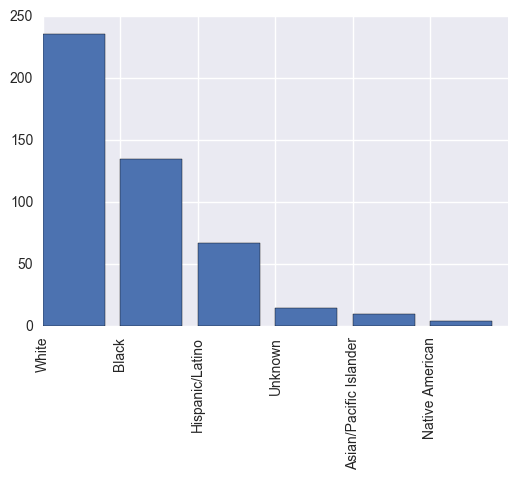

In [6]:
plt.bar(range(6), count)
plt.xticks(range(6), count.index, rotation="vertical")

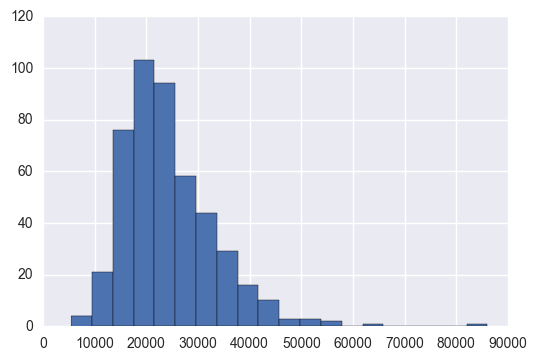

In [7]:
police_killings["p_income"][police_killings["p_income"] != "-"].astype(float).hist(bins=20)


In [8]:
police_killings["p_income"][police_killings["p_income"]!="-"].astype(float).median()

22348.0

In [16]:
police_killings["p_income"][police_killings["p_income"]!="-"].astype(float).mean()

24308.96559139785

# Income breakdown
According to the Census, median personal income in the US is 28,567, and our median is 22,348, which means that shootings tend to happen in less affluent areas. Our sample size is relatively small, though, so it's hard to make sweeping conclusions.

The avg income in US is 51,579 while the avg income of areas involved in shootings is 24308. This also points to the observation that shootings tend to happen in less  affluent areas.


In [9]:
state_pop = pd.read_csv("state_population.csv")
counts = police_killings["state_fp"].value_counts()

states = pd.DataFrame({"STATE": counts.index, "shootings":counts})
states = pd.merge(state_pop, states, on="STATE")
states["pop_millions"] = states["POPESTIMATE2015"] / 1000000
states["rate"] = states["shootings"] / states["pop_millions"]
#states.sort(columns="rate").head()
states.sort("rate")

C:\Users\epfo\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS,shootings,pop_millions,rate
6,40,1,1,9,Connecticut,3590886,2826827,78.7,1,3.590886,0.278483
37,40,1,2,42,Pennsylvania,12802503,10112229,79.0,7,12.802503,0.546768
15,40,2,4,19,Iowa,3123899,2395103,76.7,2,3.123899,0.640226
32,40,1,2,36,New York,19795791,15584974,78.7,13,19.795791,0.656705
21,40,1,1,25,Massachusetts,6794422,5407335,79.6,5,6.794422,0.735898
29,40,1,1,33,New Hampshire,1330608,1066610,80.2,1,1.330608,0.751536
19,40,1,1,23,Maine,1329328,1072948,80.7,1,1.329328,0.752260
13,40,2,3,17,Illinois,12859995,9901322,77.0,11,12.859995,0.855366
34,40,2,3,39,Ohio,11613423,8984946,77.4,10,11.613423,0.861073
45,40,2,3,55,Wisconsin,5771337,4476711,77.6,5,5.771337,0.866350


# Killings by state
States in the midwest and south seem to have the highest police killing rates, whereas those in the northeast seem to have the lowest.

In [10]:
police_killings["state"].value_counts()

CA    74
TX    46
FL    29
AZ    25
OK    22
GA    16
NY    14
CO    12
LA    11
NJ    11
WA    11
IL    11
MO    10
NC    10
OH    10
MD    10
MI     9
SC     9
VA     9
IN     8
OR     8
AL     8
KY     7
PA     7
MS     6
KS     6
MN     6
NE     6
TN     6
UT     5
MA     5
WI     5
NM     5
HI     4
AR     4
ID     4
NV     3
MT     2
AK     2
WV     2
DE     2
IA     2
ME     1
NH     1
CT     1
WY     1
DC     1
Name: state, dtype: int64

In [11]:
lowest_states = ["CT", "PA", "IA", "NY", "MA", "NH", "ME", "IL", "OH", "WI"]
highest_states = ["OK", "AZ", "NE", "HI", "AK", "ID", "NM", "LA", "CO", "DE"]
t = (police_killings["share_white"] != "-") & (police_killings["share_black"] != "-") & (police_killings["share_hispanic"] != "-")
pk = police_killings[t]
pk["share_white"].astype(float)
pk["share_black"].astype(float)
pk["share_hispanic"].astype(float)

ls = pk[pk["state"].isin(lowest_states)]
hs = pk[pk["state"].isin(highest_states)]
columns = ["pop", "county_income", "share_white", "share_black", "share_hispanic"]

ls[columns].astype(float).mean()


pop                4201.660714
county_income     54830.839286
share_white          60.616071
share_black          21.257143
share_hispanic       12.948214
dtype: float64

In [12]:
hs[columns].astype(float).mean()

pop                4315.750000
county_income     48706.967391
share_white          55.652174
share_black          11.532609
share_hispanic       20.693478
dtype: float64

# State by state rates
It looks like the states with low rates of shootings tend to have a higher proportion of blacks in the population, and a lower proportion of hispanics in the census regions where the shootings occur. It looks like the income of the counties where the shootings occur is higher.
States with high rates of shootings tend to have high hispanic population shares in the counties where shootings occur.

In [13]:
state_pop.columns

Index(['SUMLEV', 'REGION', 'DIVISION', 'STATE', 'NAME', 'POPESTIMATE2015',
       'POPEST18PLUS2015', 'PCNT_POPEST18PLUS'],
      dtype='object')

In [14]:
state=states.reset_index(drop=True)
state_list = state["NAME"].tolist()
state_killing = state["shootings"].tolist()

for c in ["North Dakota","Rhode Island","South Dakota","Vermont","Puerto Rico"]:
    state_list.append(c)
    state_killing.append(0)

state_map = pd.DataFrame({"NAME":state_list, "shootings":state_killing})

In [15]:

import folium
import pandas as pd
m = folium.Map([48,-102], zoom_start=4)
m.choropleth(
    geo_str=open('us-states.json').read(),
    data=state_map,
    columns=['NAME', 'shootings'],
    threshold_scale=[5, 20,40],
    key_on='feature.properties.name',
    fill_color='YlGn',
    )
m
